In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-methodlines-heatFE)

Let's implement the method of {numref}`Example {number} <example-methodlines-heatFE>` with second-order space semidiscretization.

In [2]:
m = 100
x, Dx, Dxx = FNC.diffper(m, [0, 1])

tfinal = 0.15  
n = 2400                 # number of time steps  
tau = tfinal / n         # time step
t = tau * arange(n+1)    # time values

Next we set an initial condition. It isn't mathematically periodic, but the end values and derivatives are so small that for numerical purposes it may as well be.

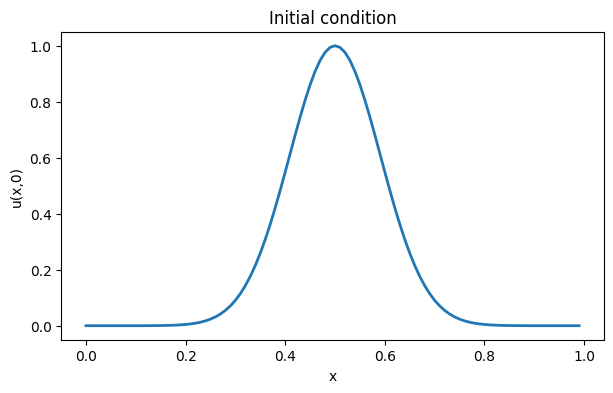

In [3]:
U = zeros([m, n+1])
U[:, 0] = exp(-60 * (x - 0.5) ** 2)
plot(x, U[:, 0])
xlabel("x");  ylabel("u(x,0)")
title("Initial condition");

The Euler time stepping simply multiplies the solution vector by the constant matrix in {eq}`Eulerxx` at each time step. Since that matrix is sparse, we will declare it as such, even though the run-time savings may not be detectable for this small value of $m$.

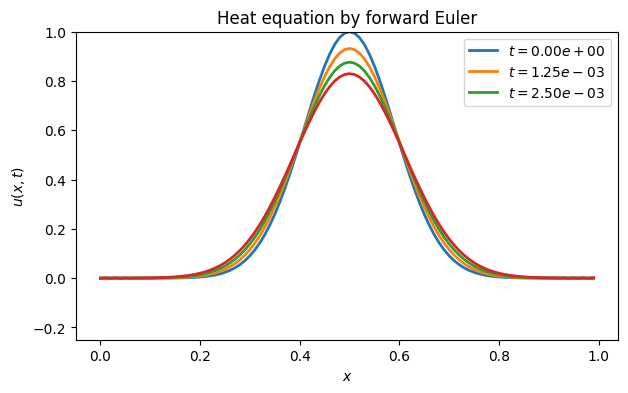

In [4]:
import scipy.sparse as sp
I = sp.eye(m)
A = I + tau * sp.csr_array(Dxx)
for j in range(n):
    U[:, j+1] = A @ U[:, j]

plot(x, U[:, :31:10])
ylim([-0.25, 1])
xlabel("$x$");  ylabel("$u(x,t)$")
legend([f"$t={tj:.2e}$" for tj in t[:60:20]])
title("Heat equation by forward Euler");

You see above that things seem to start well, with the initial peak widening and shrinking. But then there is an exponential nonphysical growth in the solution.

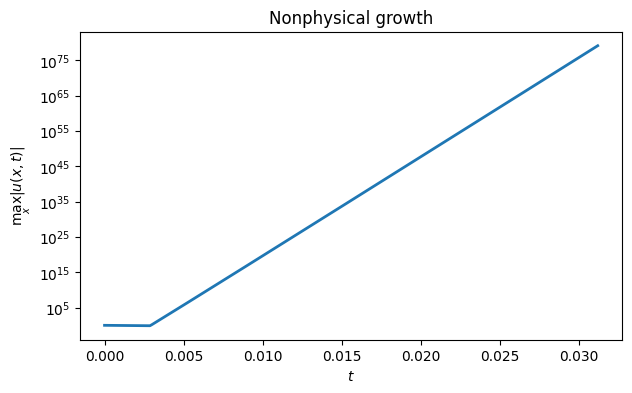

In [6]:
M = abs(U).max(axis=0)  # max in each column
semilogy(t[:500], M[:500])
xlabel("$t$");  ylabel("$\\max_x |u(x,t)|$")
title("Nonphysical growth");

In [5]:
from matplotlib.animation import FuncAnimation
fig = figure()
ax = fig.add_subplot(autoscale_on=False, xlim=(0, 1), ylim=(-1, 2))
ax.grid()

line, = ax.plot([], [], '-', lw=2)
ax.set_title("Heat equation by forward Euler")
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def snapshot(j):
    line.set_data(x, U[:, j])
    time_text.set_text(f"t = {t[j]:.2e}")
    return line, time_text

anim = FuncAnimation(fig, snapshot, frames=range(0, 100), blit=True)
anim.save("diffusionFE.mp4", fps=24)
close()